***
# <font color=green size=10>CURSO DE ESTATÍSTICA - PARTE 1</font>
***

## Trabalho de Análise Descritiva de um Conjunto de Dados

Utilizando os conhecimentos adquiridos em nosso treinamento realize uma análise descritiva básica de um conjunto de dados retirados da Pesquisa Nacional por Amostra de Domicílios - 2015 do IBGE. 

Vamos construir histogramas, calcular e avaliar medidas de tendência central, medidas separatrizes e de dispersão dos dados.

Siga o roteiro proposto e vá completando as células vazias. Procure pensar em mais informações interessantes que podem ser exploradas em nosso dataset.

# <font color=green>DATASET DO PROJETO</font>
***

### Pesquisa Nacional por Amostra de Domicílios - 2015

A <b>Pesquisa Nacional por Amostra de Domicílios - PNAD</b> investiga anualmente, de forma permanente, características gerais da população, de educação, trabalho, rendimento e habitação e outras, com periodicidade variável, de acordo com as necessidades de informação para o país, como as características sobre migração, fecundidade, nupcialidade, saúde, segurança alimentar, entre outros temas. O levantamento dessas estatísticas constitui, ao longo dos 49 anos de realização da pesquisa, um importante instrumento para formulação, validação e avaliação de políticas orientadas para o desenvolvimento socioeconômico e a melhoria das condições de vida no Brasil.

### Fonte dos Dados

https://ww2.ibge.gov.br/home/estatistica/populacao/trabalhoerendimento/pnad2015/microdados.shtm

### Variáveis utilizadas

> ### Renda
> ***

Rendimento mensal do trabalho principal para pessoas de 10 anos ou mais de idade.

> ### Idade
> ***

Idade do morador na data de referência em anos.

> ### Altura (elaboração própria)
> ***

Altura do morador em metros.

> ### UF
> ***

|Código|Descrição|
|---|---|
|11|Rondônia|
|12|Acre|
|13|Amazonas|
|14|Roraima|
|15|Pará|
|16|Amapá|
|17|Tocantins|
|21|Maranhão|
|22|Piauí|
|23|Ceará|
|24|Rio Grande do Norte|
|25|Paraíba|
|26|Pernambuco|
|27|Alagoas|
|28|Sergipe|
|29|Bahia|
|31|Minas Gerais|
|32|Espírito Santo|
|33|Rio de Janeiro|
|35|São Paulo|
|41|Paraná|
|42|Santa Catarina|
|43|Rio Grande do Sul|
|50|Mato Grosso do Sul|
|51|Mato Grosso|
|52|Goiás|
|53|Distrito Federal|

> ### Sexo	
> ***

|Código|Descrição|
|---|---|
|0|Masculino|
|1|Feminino|

> ### Anos de Estudo
> ***

|Código|Descrição|
|---|---|
|1|Sem instrução e menos de 1 ano|
|2|1 ano|
|3|2 anos|
|4|3 anos|
|5|4 anos|
|6|5 anos|
|7|6 anos|
|8|7 anos|
|9|8 anos|
|10|9 anos|
|11|10 anos|
|12|11 anos|
|13|12 anos|
|14|13 anos|
|15|14 anos|
|16|15 anos ou mais|
|17|Não determinados| 
||Não aplicável|

> ### Cor
> ***

|Código|Descrição|
|---|---|
|0|Indígena|
|2|Branca|
|4|Preta|
|6|Amarela|
|8|Parda|
|9|Sem declaração|

#### <font color='red'>Observação</font>
***
> Os seguintes tratamentos foram realizados nos dados originais:
> 1. Foram eliminados os registros onde a <b>Renda</b> era inválida (999 999 999 999);
> 2. Foram eliminados os registros onde a <b>Renda</b> era missing;
> 3. Foram considerados somente os registros das <b>Pessoas de Referência</b> de cada domicílio (responsável pelo domicílio).

***
***

### Utilize a célula abaixo para importar as biblioteca que precisar para executar as tarefas
#### <font color='red'>Sugestões: pandas, numpy, seaborn</font>

In [2]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 

### Importe o dataset e armazene o conteúdo em uma DataFrame

In [3]:
df = pd.read_csv('dados/dados.csv', sep=',')

### Visualize o conteúdo do DataFrame

In [4]:
df.head(5)

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


### Para avaliarmos o comportamento da variável RENDA vamos construir uma tabela de frequências considerando as seguintes classes em salários mínimos (SM)
#### <font color='blue'>Descreva os pontos mais relevantes que você observa na tabela e no gráfico.</font>

Classes de renda:

<b>A</b> ► Acima de 25 SM

<b>B</b> ► De 15 a 25 SM

<b>C</b> ► De 5 a 15 SM

<b>D</b> ► De 2 a 5 SM

<b>E</b> ► Até 2 SM

Para construir as classes de renda considere que o salário mínimo na época da pesquisa era de <b>R$ 788,00</b>.

#### Siga os passos abaixo:

### 1º Definir os intevalos das classes em reais (R$)

In [47]:
v_max =df['Renda'].max()
v_min =df['Renda'].min()
v_median =df['Renda'].median()
print(v_max, v_min, v_median)
SM = 788

200000 0 1200.0


In [6]:
classes = [v_min, 2*SM , 5*SM , 15*SM, 25*SM, v_max]
classes

[0, 1576, 3940, 11820, 19700, 200000]

### 2º Definir os labels das classes

In [7]:
labels = ['E', 'D', 'C','B', 'A']
labels

['E', 'D', 'C', 'B', 'A']

### 3º Construir a coluna de frequências

In [8]:
# Com as classes e labels realizamos a relação de renda e faixa de classe.
cut = pd.cut(x=df['Renda'], 
       bins= classes,
       labels=labels,
       include_lowest=True)
cut

0        E
1        E
2        E
3        D
4        E
        ..
76835    E
76836    E
76837    E
76838    E
76839    E
Name: Renda, Length: 76840, dtype: category
Categories (5, object): ['E' < 'D' < 'C' < 'B' < 'A']

In [9]:
frequencia = pd.value_counts(cut)
frequencia

E    49755
D    18602
C     7241
B      822
A      420
Name: Renda, dtype: int64

### 4º Construir a coluna de percentuais

In [10]:
percentual = pd.value_counts(cut, normalize=True)
percentual.round(2)

E    0.65
D    0.24
C    0.09
B    0.01
A    0.01
Name: Renda, dtype: float64

### 5º Juntar as colunas de frequência e percentuais e ordenar as linhas de acordo com os labels das classes

In [11]:
series = {'Frequência':frequencia ,'Distribuição %':percentual}
distribuicao = pd.DataFrame(series)
distribuicao.sort_index(ascending=True, inplace=True)
distribuicao

,Frequência,Distribuição %
E,49755,0.647514
D,18602,0.242087
C,7241,0.094235
B,822,0.010698
A,420,0.005466


In [12]:
df_labels = ['A > Acima 19700',
             'B > De 11820 a 19700',
             'C > De 3940 a 11820',
             'D > De 1576 a 3940',
             'E >  0 Até 1576',]
df_labels.reverse()
df_labels



['E >  0 Até 1576',
 'D > De 1576 a 3940',
 'C > De 3940 a 11820',
 'B > De 11820 a 19700',
 'A > Acima 19700']

In [13]:
# Criando faixas (cut) de acordo com o corte no bins
n = df.shape[0]
n

76840

In [14]:
# Criando faixas (cut) de acordo com o corte no bins
k = 1 + (10/3) * np.log10(n)
k = int(k.round(0))
k

17

In [15]:
# Criando faixas (cut) de acordo com o corte no bins
cut_bins = pd.value_counts(pd.cut(x=df['Renda'],
                  bins= 17,
                  include_lowest=True),
    sort = False
)
cut_bins

(-200.001, 11764.706]       75594
(11764.706, 23529.412]       1022
(23529.412, 35294.118]        169
(35294.118, 47058.824]         19
(47058.824, 58823.529]         16
(58823.529, 70588.235]          5
(70588.235, 82352.941]          4
(82352.941, 94117.647]          1
(94117.647, 105882.353]         6
(105882.353, 117647.059]        0
(117647.059, 129411.765]        1
(129411.765, 141176.471]        0
(141176.471, 152941.176]        0
(152941.176, 164705.882]        0
(164705.882, 176470.588]        0
(176470.588, 188235.294]        0
(188235.294, 200000.0]          3
Name: Renda, dtype: int64

In [16]:
distribuicao.index = df_labels
distribuicao.rename_axis('Faixas', axis= 'columns', inplace = True)
distribuicao

Faixas,Frequência,Distribuição %
E > 0 Até 1576,49755,0.647514
D > De 1576 a 3940,18602,0.242087
C > De 3940 a 11820,7241,0.094235
B > De 11820 a 19700,822,0.010698
A > Acima 19700,420,0.005466


In [17]:
per = distribuicao['Distribuição %'].round(4) * 100
per

E >  0 Até 1576         64.75
D > De 1576 a 3940      24.21
C > De 3940 a 11820      9.42
B > De 11820 a 19700     1.07
A > Acima 19700          0.55
Name: Distribuição %, dtype: float64

In [18]:
per.sum()

100.0

### Construa um gráfico de barras para visualizar as informações da tabela de frequências acima

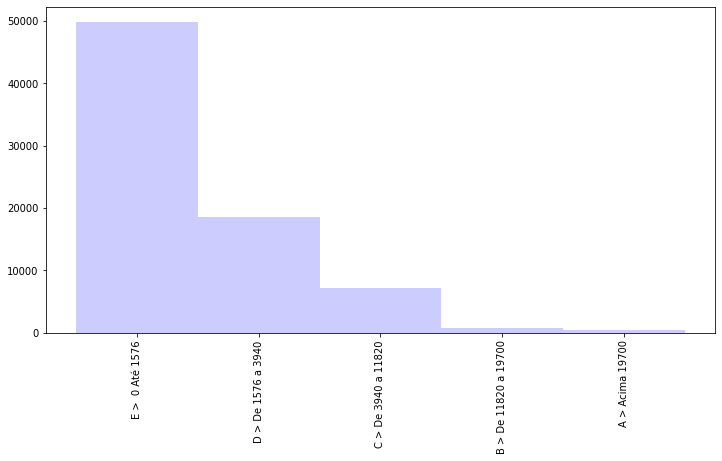

In [19]:
bar_graf = distribuicao['Frequência'].plot.bar(width= 1, color='blue', alpha=0.2, figsize=(12,6))

> ### Conclusões

Podemos concluir que a população com maior renda representa o a menor quantidade de pessoas e maior riquezas em contraposição a maior quantidade de pessoas possuem as menores rendas.

### Crie um histograma para as variáveis QUANTITATIVAS de nosso dataset
#### <font color='blue'>Descreva os pontos mais relevantes que você observa nos gráficos (assimetrias e seus tipos, possíveis causas para determinados comportamentos etc.)</font>

C:\Users\conta\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Anos')

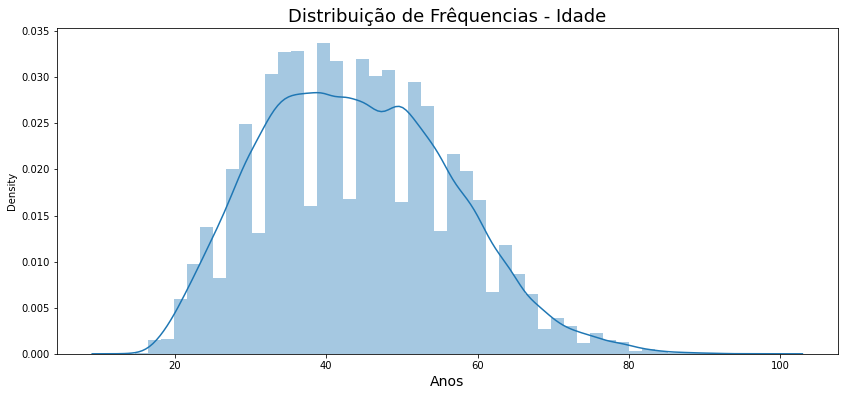

In [20]:
histograma =  sns.distplot(df['Idade'])
histograma.figure.set_size_inches(14,6)
histograma.set_title('Distribuição de Frêquencias - Idade', fontsize=18)
histograma.set_xlabel('Anos', fontsize=14)


C:\Users\conta\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Metros')

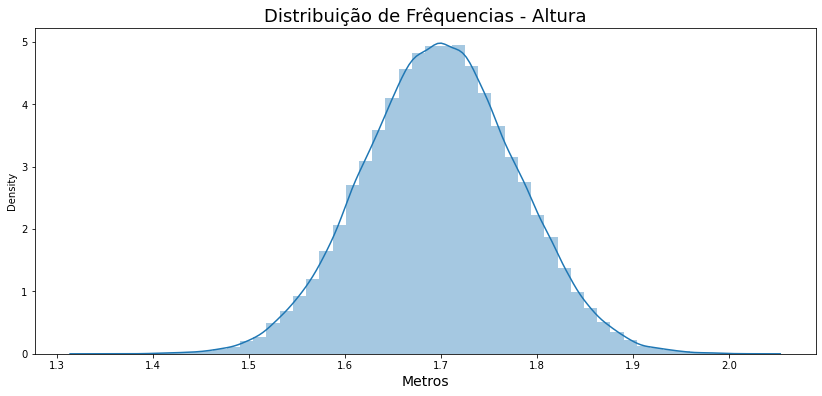

In [21]:
histograma =  sns.distplot(df['Altura'])
histograma.figure.set_size_inches(14,6)
histograma.set_title('Distribuição de Frêquencias - Altura', fontsize=18)
histograma.set_xlabel('Metros', fontsize=14)

C:\Users\conta\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'R$')

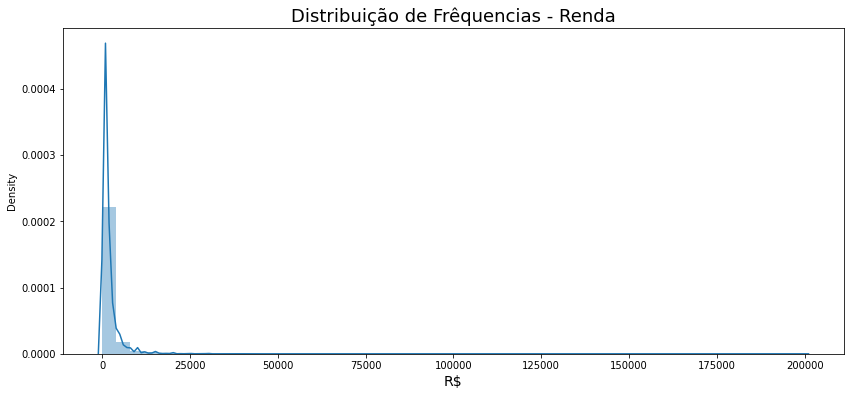

In [22]:
histograma =  sns.distplot(df['Renda'])
histograma.figure.set_size_inches(14,6)
histograma.set_title('Distribuição de Frêquencias - Renda', fontsize=18)
histograma.set_xlabel('R$', fontsize=14)

> ### Conclusões

Podemo concluir que a idade está concetrada entre 20 a 60 anos, que a média das pessoas é de 1.70 e que a renda est concetrada em poucas pessoas.

### Para a variável RENDA, construa um histograma somente com as informações das pessoas com rendimento até R$ 20.000,00

C:\Users\conta\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'R$')

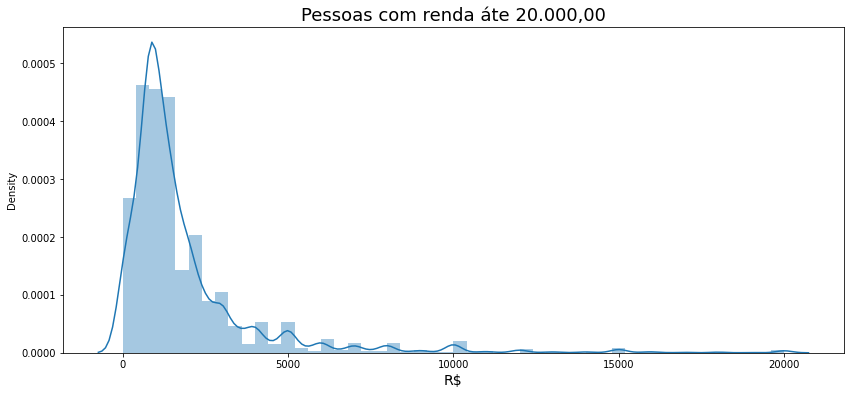

In [23]:
histograma =  sns.distplot(df.query('Renda <= 20000')['Renda'])
histograma.figure.set_size_inches(14,6)
histograma.set_title('Pessoas com renda áte 20.000,00', fontsize=18)
histograma.set_xlabel('R$', fontsize=14)

### Construa uma tabela de frequências e uma com os percentuais do cruzando das variáveis SEXO e COR
#### <font color='blue'>Avalie o resultado da tabela e escreva suas principais conclusões</font>
#### <font color='red'>Utilize os dicionários abaixo para renomear as linha e colunas das tabelas de frequências e dos gráficos em nosso projeto</font>

In [24]:
sexo = {
    0: 'Masculino', 
    1: 'Feminino'
}
cor = {
    0: 'Indígena', 
    2: 'Branca', 
    4: 'Preta', 
    6: 'Amarela', 
    8: 'Parda', 
    9: 'Sem declaração'
}
anos_de_estudo = {
    1: 'Sem instrução e menos de 1 ano', 
    2: '1 ano', 
    3: '2 anos', 
    4: '3 anos', 
    5: '4 anos', 
    6: '5 anos', 
    7: '6 anos', 
    8: '7 anos', 
    9: '8 anos', 
    10: '9 anos', 
    11: '10 anos', 
    12: '11 anos', 
    13: '12 anos', 
    14: '13 anos', 
    15: '14 anos', 
    16: '15 anos ou mais', 
    17: 'Não determinados'
}
uf = {
    11: 'Rondônia', 
    12: 'Acre', 
    13: 'Amazonas', 
    14: 'Roraima', 
    15: 'Pará', 
    16: 'Amapá', 
    17: 'Tocantins', 
    21: 'Maranhão', 
    22: 'Piauí', 
    23: 'Ceará', 
    24: 'Rio Grande do Norte', 
    25: 'Paraíba', 
    26: 'Pernambuco', 
    27: 'Alagoas', 
    28: 'Sergipe', 
    29: 'Bahia', 
    31: 'Minas Gerais', 
    32: 'Espírito Santo', 
    33: 'Rio de Janeiro', 
    35: 'São Paulo', 
    41: 'Paraná', 
    42: 'Santa Catarina', 
    43: 'Rio Grande do Sul', 
    50: 'Mato Grosso do Sul', 
    51: 'Mato Grosso', 
    52: 'Goiás', 
    53: 'Distrito Federal'
}

In [25]:
df.head(2)

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790


In [26]:
frequencia = pd.crosstab(df['Cor'], df['Sexo'])
frequencia.rename(columns=sexo,inplace=True)
frequencia.rename(index=cor,inplace=True)
frequencia

Sexo,Masculino,Feminino
Cor,,
Indígena,256,101
Branca,22194,9621
Preta,5502,2889
Amarela,235,117
Parda,25063,10862


In [27]:
percentual = pd.crosstab(df['Cor'], df['Sexo'], normalize=True)
percentual.rename(columns=sexo,inplace=True)
percentual.rename(index=cor,inplace=True)
percentual

Sexo,Masculino,Feminino
Cor,,
Indígena,0.003332,0.001314
Branca,0.288834,0.125208
Preta,0.071603,0.037598
Amarela,0.003058,0.001523
Parda,0.326171,0.141359


> ### Conclusões

Podemos indentificar que a população masculina é maior que a população feminina.

## Realize, para a variável RENDA, uma análise descritiva com as ferramentas que aprendemos em nosso treinamento

### Obtenha a média aritimética

In [28]:
media = df['Renda'].mean()
media

2000.3831988547631

### Obtenha a mediana

In [29]:
mediana = df['Renda'].median()
mediana

1200.0

### Obtenha a moda

In [30]:
moda = df['Renda'].mode()
moda[0]

788

### Obtenha o desvio médio absoluto

In [31]:
dma = df['Renda'].mad()
dma

1526.4951371644931

### Obtenha a variância

In [32]:
var = df['Renda'].var()
var

11044906.00622118

### Obtenha o desvio-padrão

In [33]:
desv_padrao = df['Renda'].std()
desv_padrao

3323.3877303470294

### Obtenha a média, mediana e valor máximo da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mean', 'median', 'max'}</i></font>

In [34]:
renda_sexo_e_cor = pd.crosstab(df['Cor'],
                               df['Sexo'],
                               values=df['Renda'], aggfunc={'mean','median','max'})
renda_sexo_e_cor.rename(index=cor, inplace=True)
renda_sexo_e_cor.rename(columns=sexo, inplace=True)
                    
renda_sexo_e_cor

max                   mean                 median         
Sexo     Masculino  Feminino    Masculino     Feminino Masculino Feminino
Cor                                                                      
Indígena   10000.0  120000.0  1081.710938  2464.386139     797.5    788.0
Branca    200000.0  100000.0  2925.744435  2109.866750    1700.0   1200.0
Preta      50000.0   23000.0  1603.861687  1134.596400    1200.0    800.0
Amarela    50000.0   20000.0  4758.251064  3027.341880    2800.0   1500.0
Parda     100000.0   30000.0  1659.577425  1176.758516    1200.0    800.0

> ### Conclusões

A renda do homem branco é maior que as demais.

### Obtenha as medidas de dispersão da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mad', 'var', 'std'}</i></font>

In [35]:
renda_sexo_e_cor = pd.crosstab(df['Cor'],
                               df['Sexo'],
                               values=df['Renda'], aggfunc={'mad', 'var', 'std'})
renda_sexo_e_cor.rename(index=cor, inplace=True)
renda_sexo_e_cor.rename(columns=sexo, inplace=True)
                    
renda_sexo_e_cor.round(2)

mad                std                    var              
Sexo     Masculino Feminino Masculino  Feminino    Masculino      Feminino
Cor                                                                       
Indígena    798.91  3007.89   1204.09  11957.50   1449841.13  1.429818e+08
Branca     2261.01  1670.97   4750.79   3251.01  22570023.41  1.056909e+07
Preta       975.60   705.45   1936.31   1349.80   3749293.59  1.821960e+06
Amarela    3709.60  2549.15   5740.82   3731.17  32957069.62  1.392166e+07
Parda      1125.83   811.58   2312.09   1596.23   5345747.15  2.547960e+06

> ### Conclusões

A maior variância se encontra na homem pardo.

### Construa um box plot da variável RENDA segundo SEXO e COR
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

<AxesSubplot:title={'center':'Box Plot Renda por Sexo e Cor'}, xlabel='R$', ylabel='Cor'>

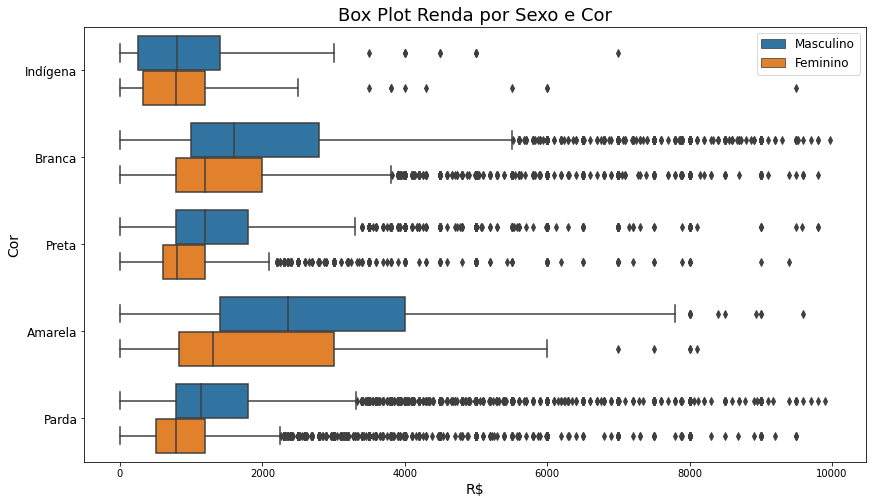

In [36]:
boxplot = sns.boxplot(x= 'Renda', y='Cor', hue='Sexo',data = df.query('Renda < 10000'), orient='h')
boxplot.figure.set_size_inches(14, 8) # Tamanho
boxplot.set_title('Box Plot Renda por Sexo e Cor',fontsize=18) # Título
boxplot.set_xlabel('R$',fontsize=14) # Etiqueta do Eixo X
boxplot.set_ylabel('Cor',fontsize=14) # Etiqueta do Eixo Y

boxplot.set_yticklabels(['Indígena','Branca','Preta','Amarela','Parda'],fontsize=12)

# Configurando Legenda
handles, _ = boxplot.get_legend_handles_labels()
boxplot.legend(handles,['Masculino', 'Feminino'], fontsize=12)
boxplot


> ### Conclusões

Podemos concluír que a deferença entre sexos existe entre todas as raças, porém podemos observar que na raça índigena a essa diferença é muito pouca.

# <font color="red">DESAFIO<font>
### Qual percentual de pessoas de nosso <i>dataset</i> ganham um salário mínimo (R$ 788,00) ou menos?
#### <font color='red'>Utilize a função <i>percentileofscore()</i> do <i>scipy</i> para realizar estas análises.</font>
#### Mais informações: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html


In [37]:
df.head(2)

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790


In [38]:
from scipy import stats


In [39]:
percentual = stats.percentileofscore(df['Renda'], 788, kind='weak')
print("{0:.2f}%".format(percentual))

28.87%


### Qual o valor máximo ganho por 99% das pessoas de nosso <i>dataset</i>?
#### <font color='red'>Utilize o método <i>quantile()</i> do <i>pandas</i> para realizar estas análises.</font>

In [40]:
valor = df['Renda'].quantile(.99)
print('R$ {0:.2f}'.format(valor))
print(f'R$ {valor:.2f}')

R$ 15000.00
R$ 15000.00


### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = ['mean', 'median', 'max', 'std']</i></font>

In [41]:
renda_sexo_e_anos = pd.crosstab(df['Anos de Estudo'],
                               df['Sexo'],
                               values=df['Renda'], aggfunc={'mean', 'median', 'max', 'std'})
renda_sexo_e_anos.rename(index=anos_de_estudo, inplace=True)
renda_sexo_e_anos.rename(columns=sexo, inplace=True)
                    
renda_sexo_e_anos.round(2)

max                mean           \
Sexo                           Masculino  Feminino Masculino Feminino   
Anos de Estudo                                                          
Sem instrução e menos de 1 ano   30000.0   10000.0    799.49   516.20   
1 ano                            30000.0    2000.0    895.63   492.77   
2 anos                           40000.0    4000.0    931.18   529.91   
3 anos                           80000.0    3500.0   1109.20   546.85   
4 anos                           50000.0   10000.0   1302.33   704.28   
5 anos                           35000.0    8000.0   1338.65   781.39   
6 anos                           25000.0    6000.0   1448.88   833.73   
7 anos                           40000.0    9000.0   1465.50   830.75   
8 anos                           30000.0   18000.0   1639.40   933.62   
9 anos                           60000.0   20000.0   1508.04   868.02   
10 anos                          45000.0    6000.0   1731.27   925.92   
11 anos                         200000.0  100000.0   2117.06  1286.79   
12 anos                          30000.0  120000.0   2470.33  1682.31   
13 anos                          25000.0   20000.0   3195.10  1911.73   
14 anos                          50000.0   20000.0   3706.62  2226.46   
15 anos ou mais                 200000.0  100000.0   6134.28  3899.51   
Não determinados                  7000.0    3000.0   1295.76   798.17   

                                  median                std           
Sexo                           Masculino Feminino Masculino Feminino  
Anos de Estudo                                                        
Sem instrução e menos de 1 ano     700.0    390.0   1023.90   639.31  
1 ano                              788.0    400.0   1331.95   425.29  
2 anos                             788.0    450.0   1435.17   498.23  
3 anos                             800.0    500.0   2143.80   424.12  
4 anos                            1000.0    788.0   1419.82   629.55  
5 anos                            1045.0    788.0   1484.65   635.78  
6 anos                            1200.0    788.0   1476.63   574.55  
7 anos                            1200.0    788.0   1419.71   602.04  
8 anos                            1300.0    800.0   1515.58   896.78  
9 anos                            1200.0    788.0   2137.66   973.22  
10 anos                           1218.0    800.0   2078.61   620.61  
11 anos                           1500.0   1000.0   2676.54  1819.04  
12 anos                           1800.0   1200.0   2268.08  4851.83  
13 anos                           2400.0   1300.0   2797.12  2053.79  
14 anos                           2500.0   1600.0   3987.21  2064.08  
15 anos ou mais                   4000.0   2800.0   7447.61  4212.77  
Não determinados                  1200.0    788.0    979.65   459.99

### Construa um box plot da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Utilize a variável IDADE para identificar se a desigualdade se verifica para pessoas de mesma idade. Exemplo: <i>data=dados.query('Renda < 10000 and Idade == 40')</i> ou <i>data=dados.query('Renda < 10000 and Idade == 50')</i></font>
#### <font color='red'>3º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

<AxesSubplot:title={'center':'Box Plot Renda por Sexo e Anos de Estudo'}, xlabel='R$', ylabel='Anos de Estudo'>

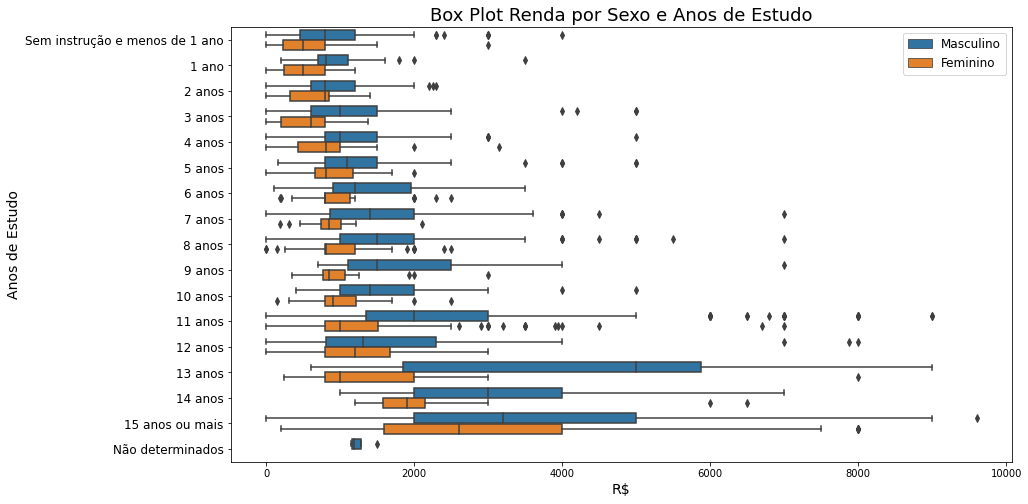

In [42]:
boxplot = sns.boxplot(x= 'Renda', y='Anos de Estudo', hue='Sexo',data = df.query('Renda < 10000 and Idade ==50'), orient='h')
boxplot.figure.set_size_inches(14, 8) # Tamanho
boxplot.set_title('Box Plot Renda por Sexo e Anos de Estudo',fontsize=18) # Título
boxplot.set_xlabel('R$',fontsize=14) # Etiqueta do Eixo X
boxplot.set_ylabel('Anos de Estudo',fontsize=14) # Etiqueta do Eixo Y

boxplot.set_yticklabels([key for key in anos_de_estudo.values()],fontsize=12)

# Configurando Legenda
handles, _ = boxplot.get_legend_handles_labels()
boxplot.legend(handles,['Masculino', 'Feminino'], fontsize=12)
boxplot

> ### Conclusões
podemos concluír que a renda aumanta conforme os anos de estudo.

### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>Utilize o método <i>groupby()</i> do <i>pandas</i> juntamente com o método <i>agg()</i> para contruir a tabulação. O método <i>agg()</i> pode receber um dicionário especificando qual coluna do DataFrame deve ser utilizada e qual lista de funções estatísticas queremos obter, por exemplo: <i>dados.groupby(['UF']).agg({'Renda': ['mean', 'median', 'max', 'std']})</i></font>

In [43]:
renda_uf = df.groupby(['UF']).agg({'Renda': ['mean', 'median', 'max']})
renda_uf.rename(index=uf)

Renda                
                            mean  median     max
UF                                              
Rondônia             1789.761223  1200.0   50000
Acre                 1506.091782   900.0   30000
Amazonas             1445.130100   900.0   22000
Roraima              1783.588889  1000.0   20000
Pará                 1399.076871   850.0   50000
Amapá                1861.353516  1200.0   15580
Tocantins            1771.094946  1000.0   60000
Maranhão             1019.432009   700.0   30000
Piauí                1074.550784   750.0   40000
Ceará                1255.403692   789.0   25000
Rio Grande do Norte  1344.721480   800.0   15500
Paraíba              1293.370487   788.0   30000
Pernambuco           1527.079319   900.0   50000
Alagoas              1144.552602   788.0   11000
Sergipe              1109.111111   788.0   16000
Bahia                1429.645094   800.0  200000
Minas Gerais         2056.432084  1200.0  100000
Espírito Santo       2026.383852  1274.0  100000
Rio de Janeiro       2496.403168  1400.0  200000
São Paulo            2638.104986  1600.0   80000
Paraná               2493.870753  1500.0  200000
Santa Catarina       2470.854945  1800.0   80000
Rio Grande do Sul    2315.158336  1500.0   35000
Mato Grosso do Sul   2262.604167  1500.0   42000
Mato Grosso          2130.652778  1500.0   35000
Goiás                1994.580794  1500.0   30000
Distrito Federal     4241.954722  2000.0  100000

### Construa um box plot da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>

<AxesSubplot:title={'center':'Box Plot Renda por Estados'}, xlabel='R$', ylabel='Estados'>

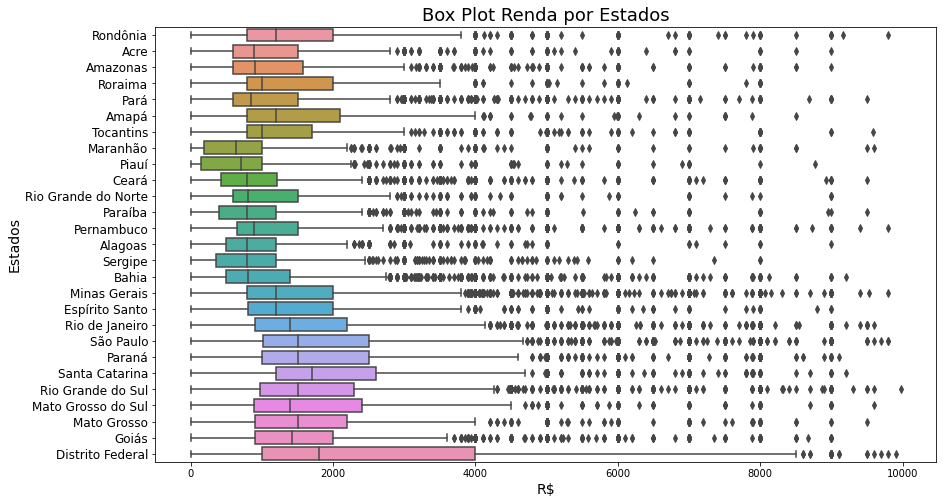

In [44]:
boxplot = sns.boxplot(x= 'Renda', y='UF', data = df.query('Renda < 10000'), orient='h')
boxplot.figure.set_size_inches(14, 8) # Tamanho
boxplot.set_title('Box Plot Renda por Estados',fontsize=18) # Título
boxplot.set_xlabel('R$',fontsize=14) # Etiqueta do Eixo X
boxplot.set_ylabel('Estados',fontsize=14) # Etiqueta do Eixo Y

boxplot.set_yticklabels([key for key in uf.values()],fontsize=12)

boxplot


<AxesSubplot:title={'center':'Box Plot Renda por Estados'}, xlabel='R$', ylabel='Estados'>

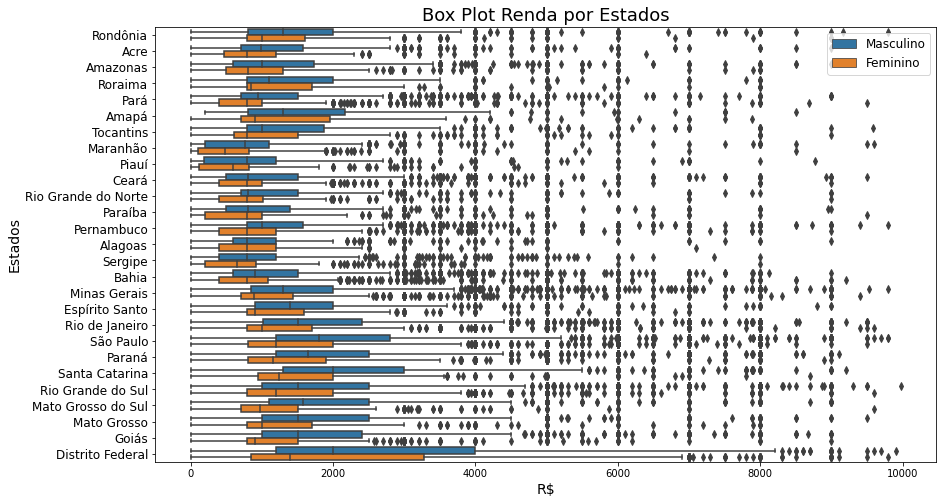

In [45]:
boxplot = sns.boxplot(x= 'Renda', hue='Sexo',  y='UF', data = df.query('Renda < 10000'), orient='h')
boxplot.figure.set_size_inches(14, 8) # Tamanho
boxplot.set_title('Box Plot Renda por Estados',fontsize=18) # Título
boxplot.set_xlabel('R$',fontsize=14) # Etiqueta do Eixo X
boxplot.set_ylabel('Estados',fontsize=14) # Etiqueta do Eixo Y

boxplot.set_yticklabels([key for key in uf.values()],fontsize=12)

# Configurando Legenda
handles, _ = boxplot.get_legend_handles_labels()
boxplot.legend(handles,['Masculino', 'Feminino'], fontsize=12)

boxplot


> ### Conclusões

Podemos identificar que as maiores rendas estão no distrito federal.